In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils
import math

In [5]:
import importlib  
module = importlib.import_module('1) detect_roi')
detect_roi = module.detect_roi

In [6]:
from os import listdir
from os.path import isfile, join
images_paths = [f for f in listdir('../images') if isfile(join('../images', f))]

In [64]:
def rotate_image(image, angle, center):
  """Function which rotates the given image, by the given angle, along the given centre"""
  # Rotation matrix
  rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
  # Rotated image
  image_rot = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return image_rot, rot_mat


def sort_bb_points_for_visualization(bb_points_sorted):
    """Function which sorts the bb points differently, for making the bb compliant with the visualization API"""
    bb_rot = bb_points_sorted.copy()
    bb_rot[2, :] = bb_points_sorted[3, :]
    bb_rot[3, :] = bb_points_sorted[2, :]
    return bb_rot.astype(int)


def rotate_image_boundingBox(image, bb_points_sorted, bb_width, bb_height, visualize_rot_image_bb=False):
    """Rotate the given image and the given bounding box, such that the bounding box becomes perfectly aligned with the 
    image axes.

    Parameters
    ----------
    image : np.array
        Input image
    bb_points_sorted : np.array
        Array 4x2, containing the coordinates of the four bounding box points. 
        The points are ordered in the following way: up-left, up-right, bottom-left, bottom-right.
    bb_width : int
        Width of the bounding box.
    bb_height : _type_
        Height of the bounding box.
    visualize_rot_image_bb : bool, optional
        Whether to visualize or not the rotated input image with the rotated bounding box, by default False

    Returns
    -------
    image_rot : np.array
        Rotated input image
    bb_points_sorted_rot : np.array
        The rotated bounding box. More precisely, array containing the 4 verteces of the rotated bounding box
    """
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    point1 = bb_points_sorted[0, :]
    point2 = bb_points_sorted[1, :]
    point3 = bb_points_sorted[2, :]
    point4 = bb_points_sorted[3, :]
    
    angle1 = math.degrees(math.atan((point2[1]-point1[1])/(point2[0]-point1[0])))
    #angle2 = 90-abs(math.degrees(math.atan((point1[1]-point3[1])/(point1[0]-point3[0]))))
    angle = angle1#(angle1+angle2)/2
    
    if abs(angle)<10**(-4):  # The angle is 0: the bounding box is already perfectly aligned. No rotation is perfomed.
        #gray_rot, image_rot, bb_points_sorted_rot = gray, image, bb_points_sorted
        image_rot, bb_points_sorted_rot = image, bb_points_sorted
    
    else:  # The angle is not 0: a rotation of the image must be perfomed.
        bb_points_sorted_rot = np.array([point1,
                              [point1[0]+bb_width-1,point1[1]],
                              [point1[0],point1[1]+bb_height-1],
                              [point1[0]+bb_width-1,point1[1]+bb_height-1]], dtype='float32') 
        
        image_rot, rot_mat = rotate_image(image, angle=angle, center=point1)

    if visualize_rot_image_bb:
        image_rot_bb = image_rot.copy()
        cv2.drawContours(image_rot_bb, [sort_bb_points_for_visualization(bb_points_sorted_rot)], -1, (0, 255, 0), 3)
        plt.figure()
        plt.imshow(image_rot_bb, 'gray')
        plt.title('Rotated image, with the rotated bounding box')
    
    return image_rot, bb_points_sorted_rot

In [8]:
def rotate(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    bb_points_sorted, bb_width, bb_height = detect_roi(image, visualize_bounding_box=True)
    
    image_rot, bb_points_sorted_rot = rotate_image_boundingBox(image, bb_points_sorted, bb_width, bb_height, 
                                                           visualize_rot_image_bb=True)
    
    gray_rot = cv2.cvtColor(image_rot, cv2.COLOR_BGR2GRAY)
    
    roi_image = gray_rot[int(bb_points_sorted_rot[0][1]):int(bb_points_sorted_rot[0][1]+bb_height), 
                     int(bb_points_sorted_rot[0][0]):int(bb_points_sorted_rot[0][0]+bb_width)]
    
    plt.figure()
    plt.imshow(roi_image, 'gray')
    plt.title('ROI image')

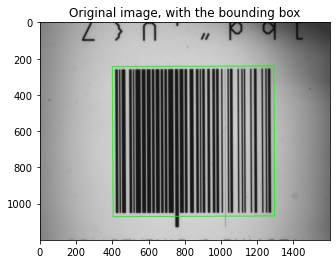

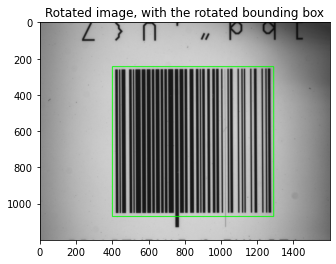

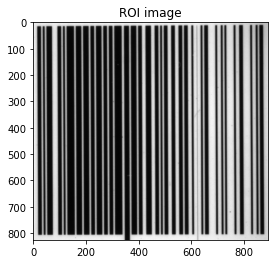

In [9]:
rotate(f'../images/{images_paths[0]}')

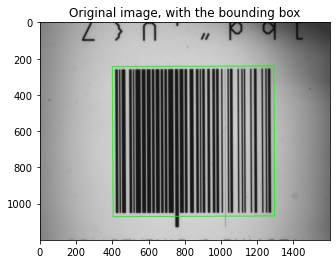

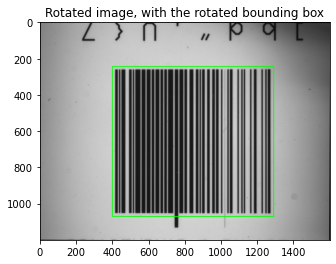

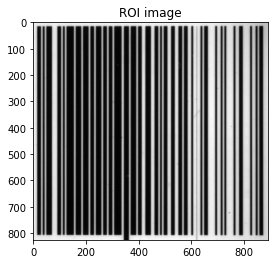

In [65]:
rotate(f'../images/{images_paths[0]}')

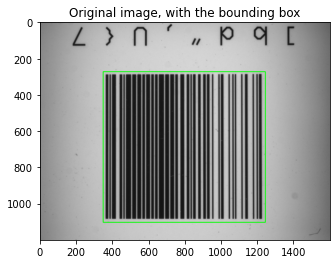

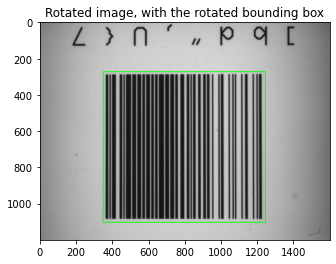

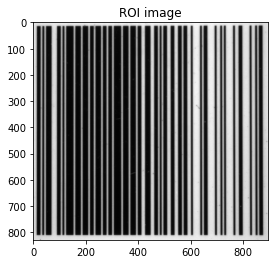

In [66]:
rotate(f'../images/{images_paths[1]}')

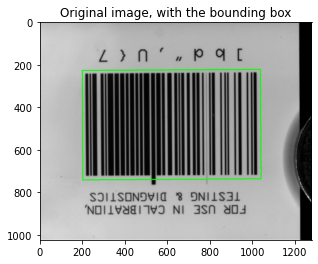

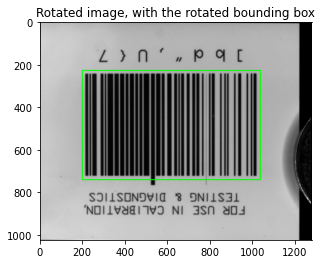

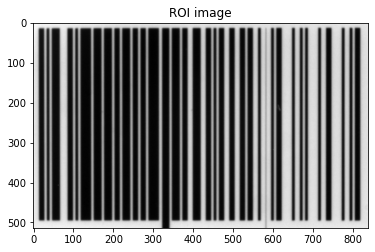

In [67]:
rotate(f'../images/{images_paths[2]}')

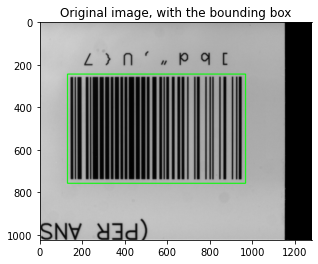

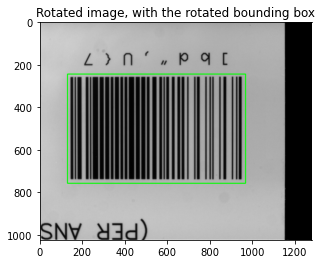

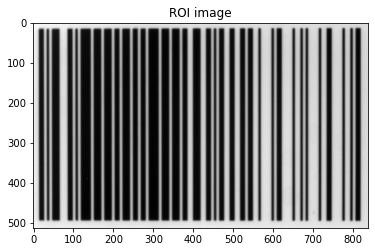

In [68]:
rotate(f'../images/{images_paths[3]}')

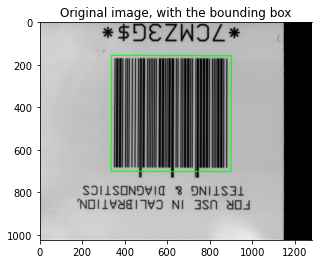

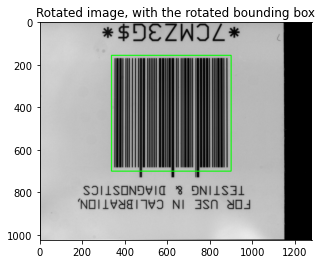

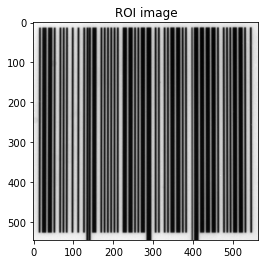

In [69]:
rotate(f'../images/{images_paths[4]}')

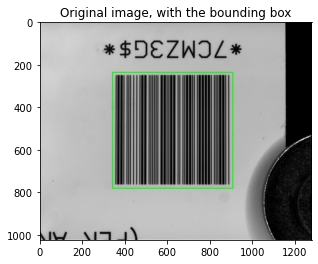

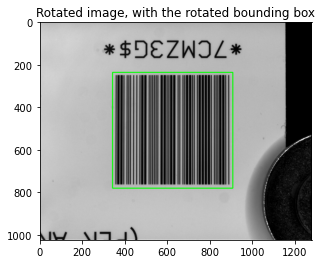

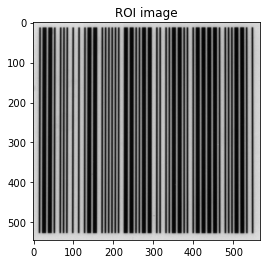

In [70]:
rotate(f'../images/{images_paths[5]}')

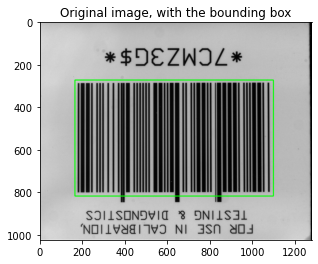

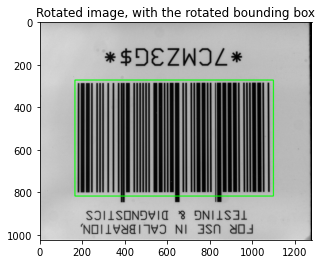

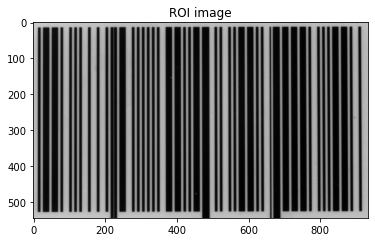

In [71]:
rotate(f'../images/{images_paths[6]}')

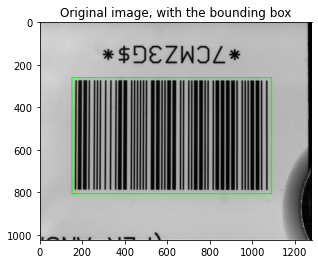

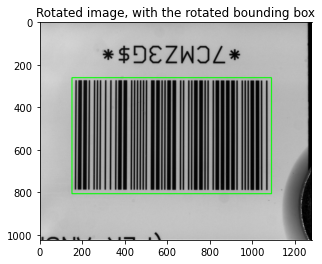

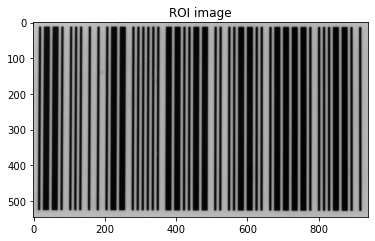

In [72]:
rotate(f'../images/{images_paths[7]}')

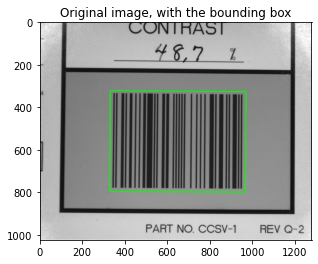

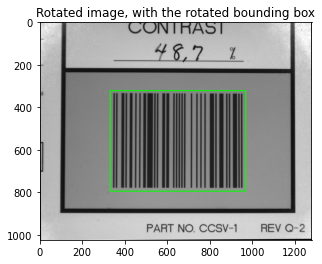

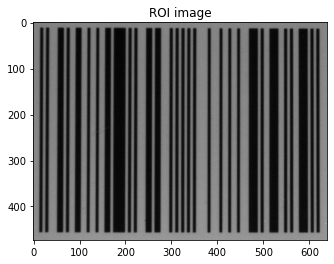

In [73]:
rotate(f'../images/{images_paths[8]}')

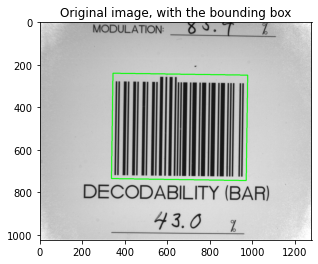

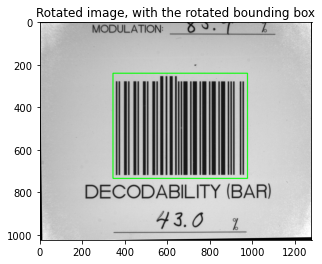

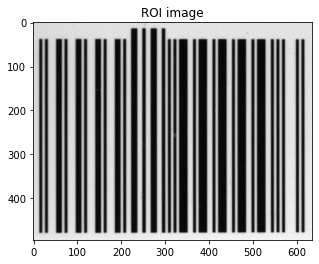

In [74]:
rotate(f'../images/{images_paths[9]}')

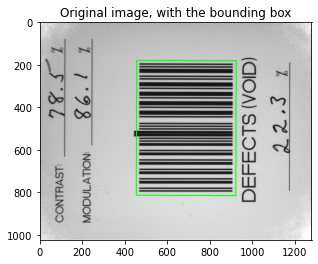

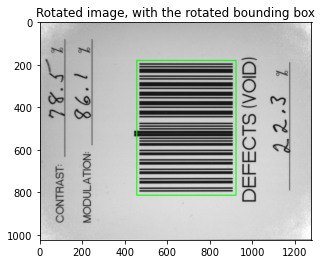

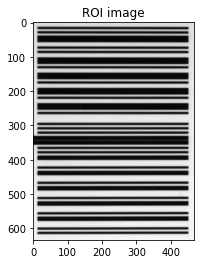

In [75]:
rotate(f'../images/{images_paths[10]}')

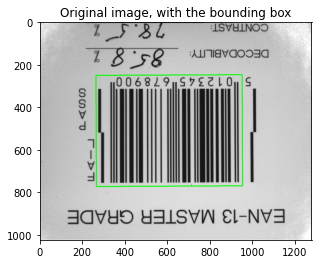

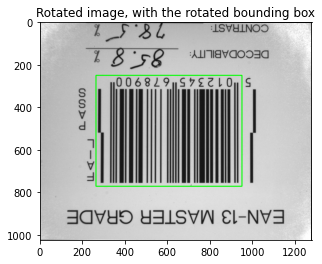

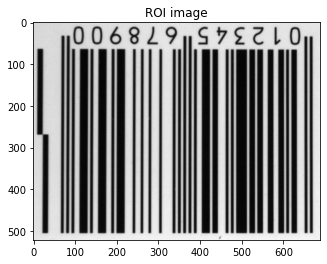

In [76]:
rotate(f'../images/{images_paths[11]}')

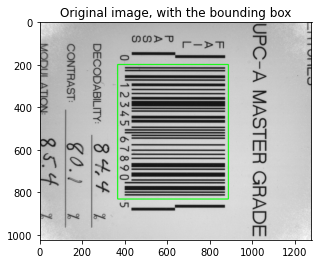

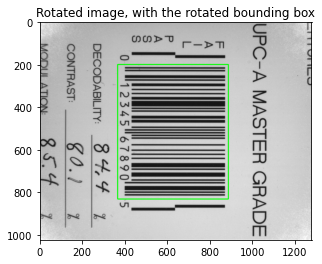

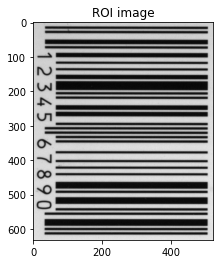

In [77]:
rotate(f'../images/{images_paths[12]}')

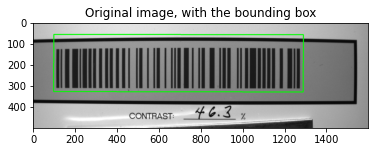

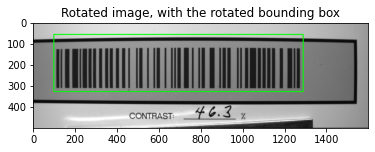

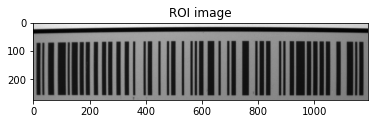

In [78]:
rotate(f'../images/{images_paths[13]}')

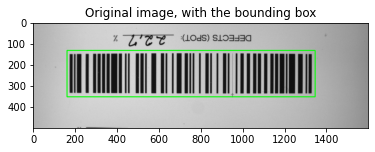

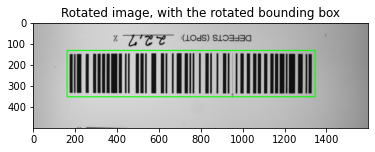

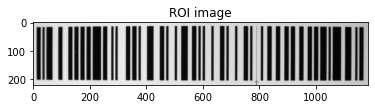

In [79]:
rotate(f'../images/{images_paths[14]}')

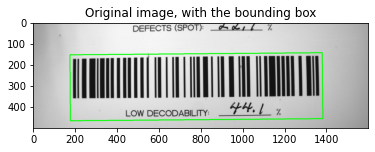

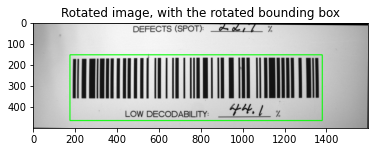

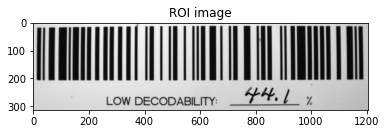

In [80]:
rotate(f'../images/{images_paths[15]}')

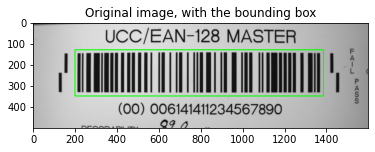

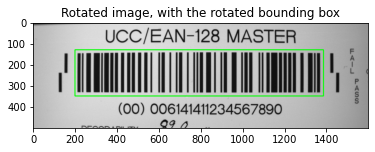

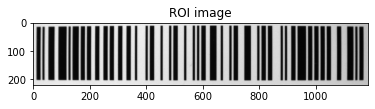

In [81]:
rotate(f'../images/{images_paths[16]}')

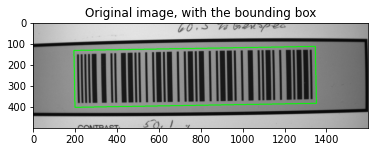

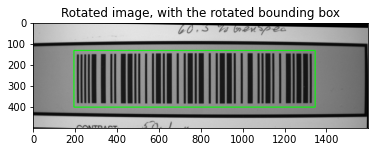

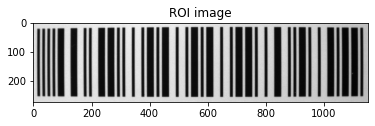

In [82]:
rotate(f'../images/{images_paths[17]}')

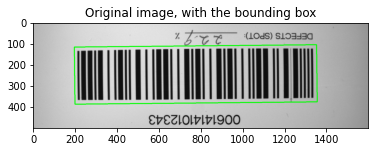

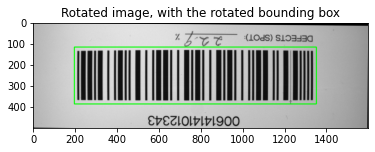

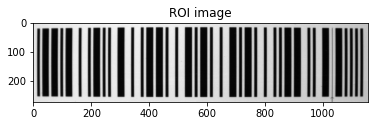

In [83]:
rotate(f'../images/{images_paths[18]}')

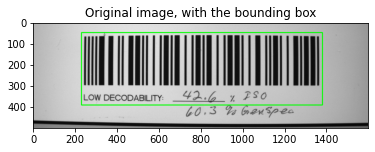

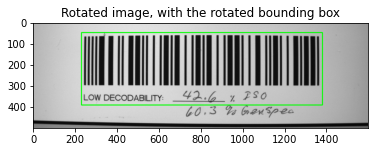

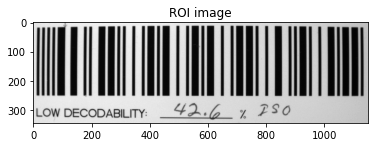

In [84]:
rotate(f'../images/{images_paths[19]}')

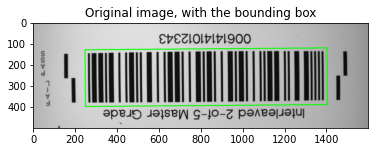

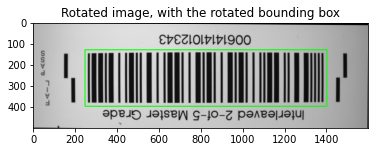

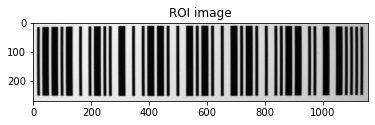

In [85]:
rotate(f'../images/{images_paths[20]}')

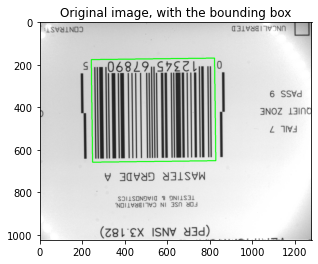

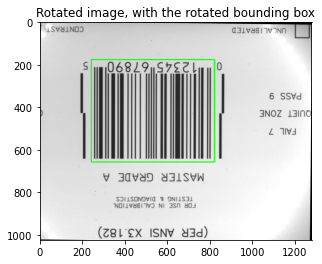

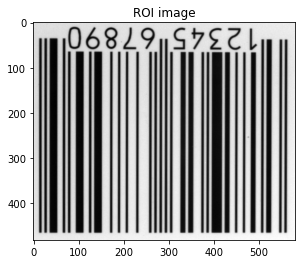

In [86]:
rotate(f'../images/{images_paths[22]}')

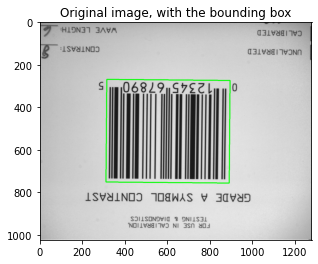

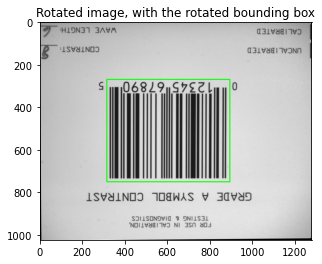

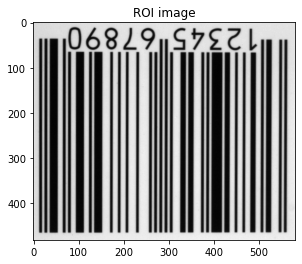

In [87]:
rotate(f'../images/{images_paths[23]}')

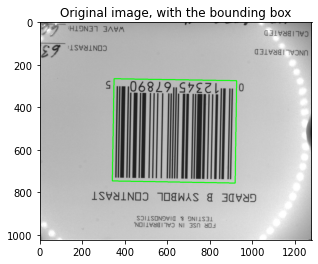

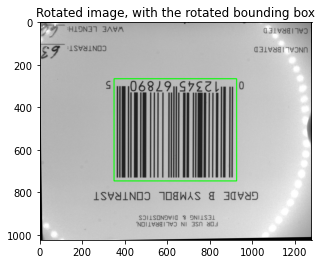

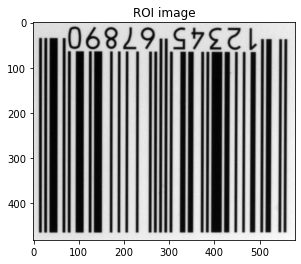

In [88]:
rotate(f'../images/{images_paths[24]}')

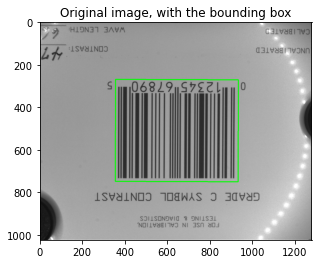

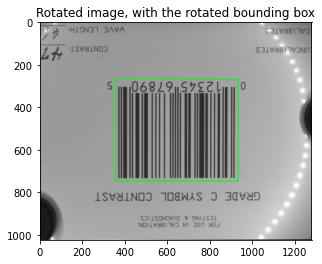

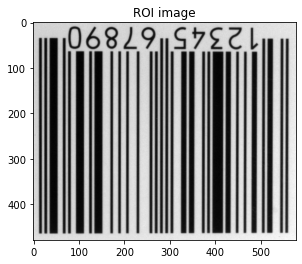

In [89]:
rotate(f'../images/{images_paths[25]}')

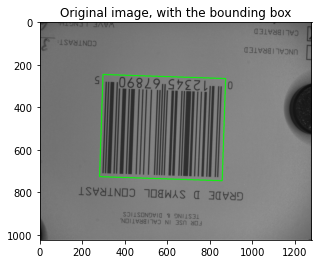

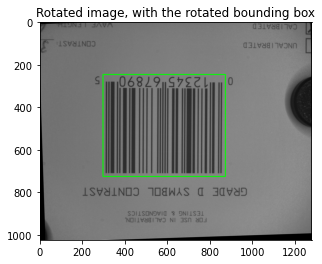

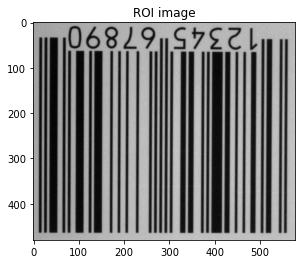

In [90]:
rotate(f'../images/{images_paths[26]}')

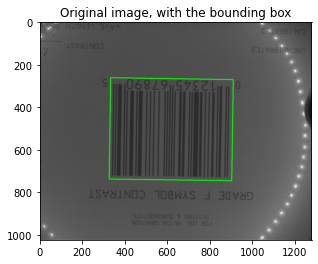

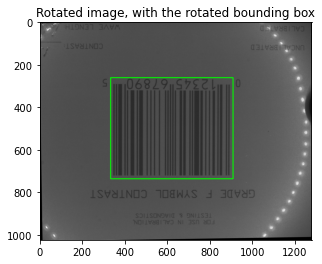

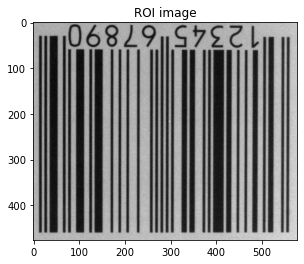

In [91]:
rotate(f'../images/{images_paths[27]}')

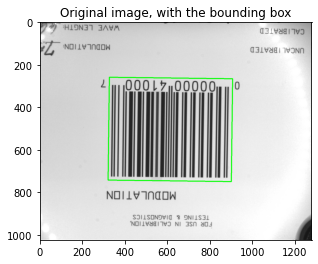

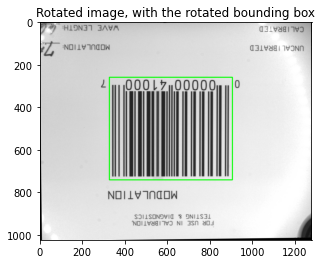

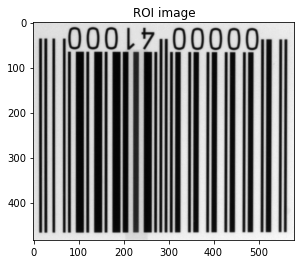

In [92]:
rotate(f'../images/{images_paths[28]}')

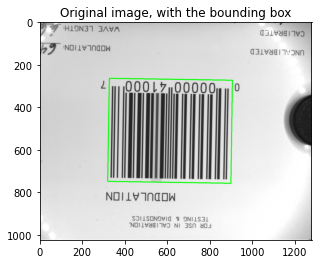

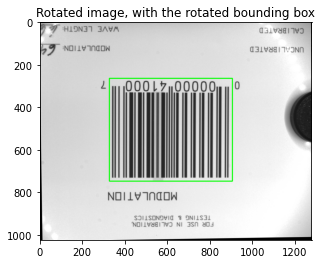

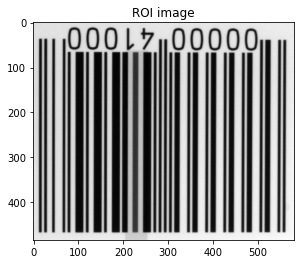

In [93]:
rotate(f'../images/{images_paths[29]}')

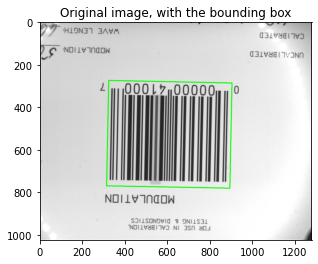

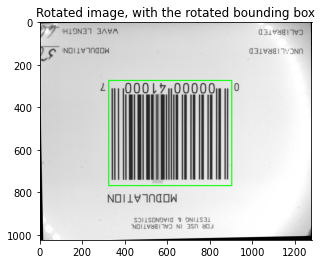

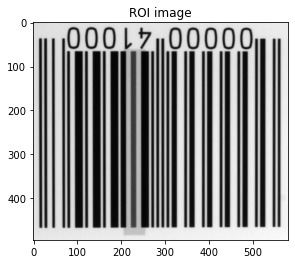

In [94]:
rotate(f'../images/{images_paths[30]}')

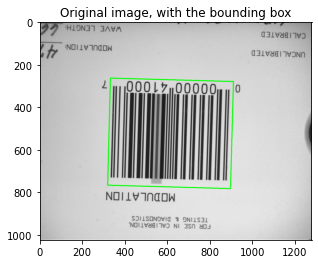

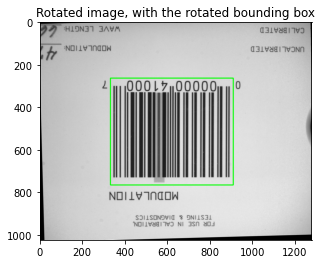

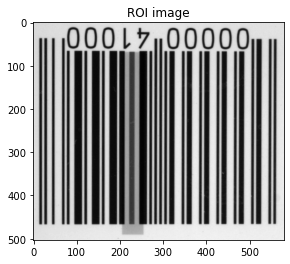

In [95]:
rotate(f'../images/{images_paths[31]}')

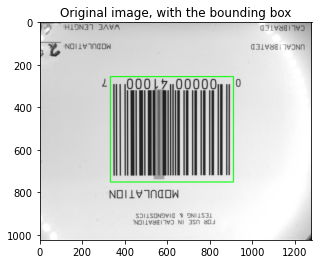

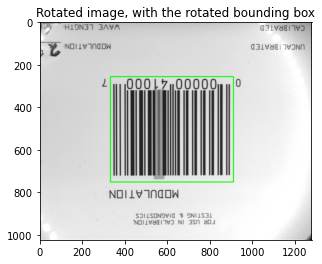

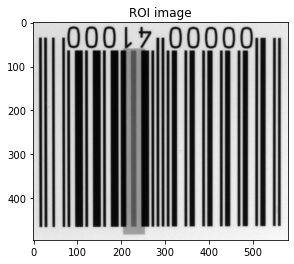

In [96]:
rotate(f'../images/{images_paths[32]}')

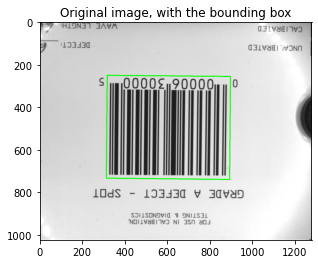

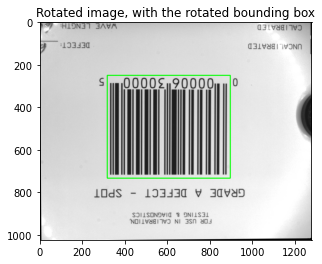

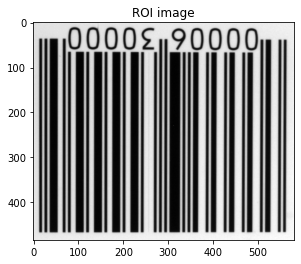

In [97]:
rotate(f'../images/{images_paths[33]}')

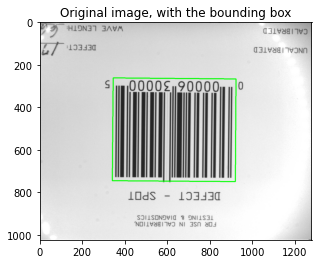

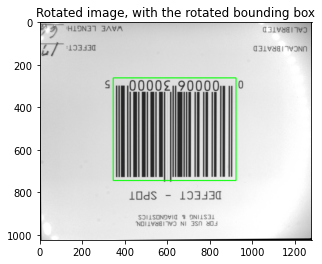

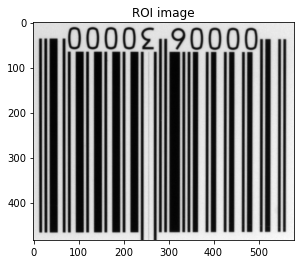

In [98]:
rotate(f'../images/{images_paths[34]}')

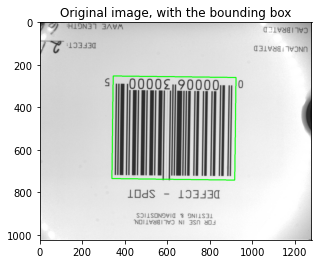

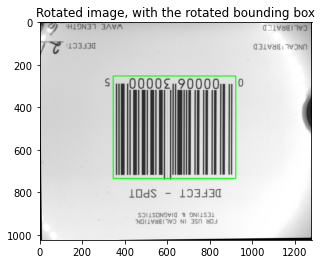

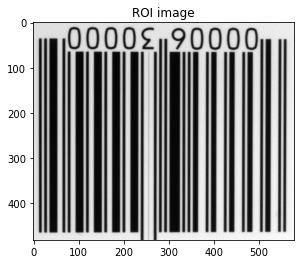

In [99]:
rotate(f'../images/{images_paths[35]}')

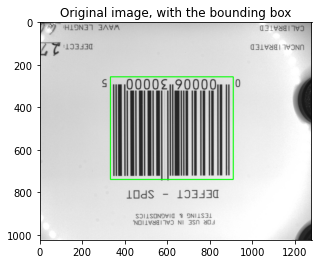

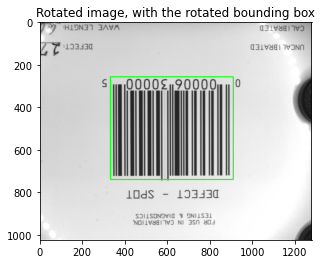

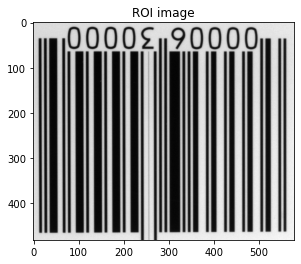

In [100]:
rotate(f'../images/{images_paths[36]}')

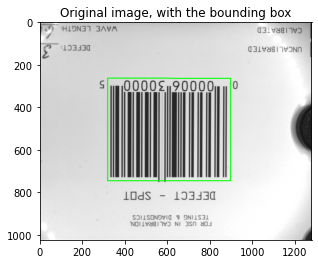

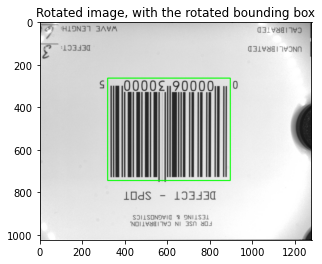

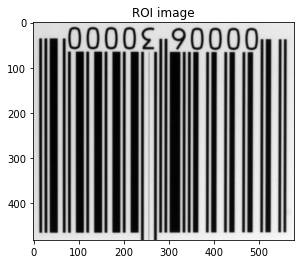

In [101]:
rotate(f'../images/{images_paths[37]}')

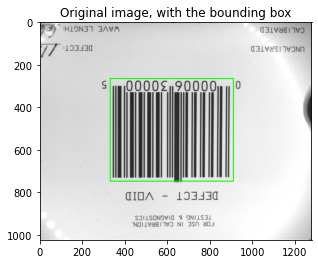

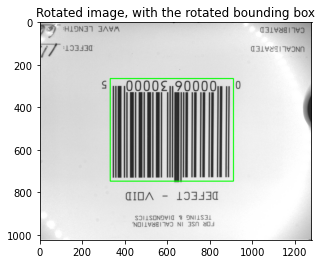

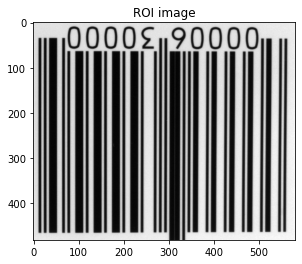

In [102]:
rotate(f'../images/{images_paths[38]}')

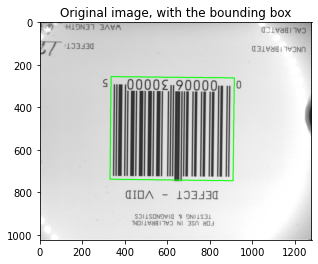

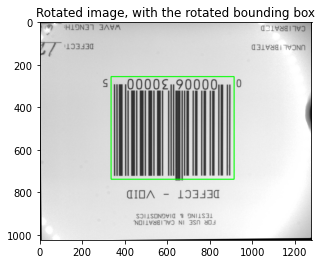

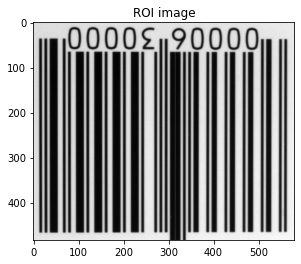

In [103]:
rotate(f'../images/{images_paths[39]}')

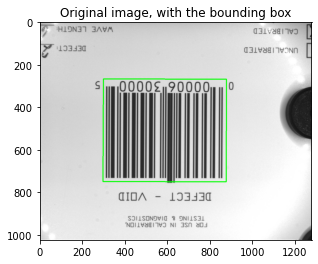

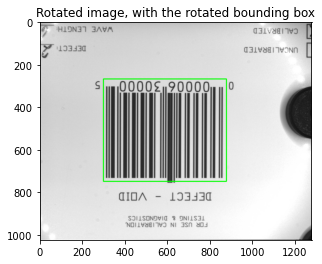

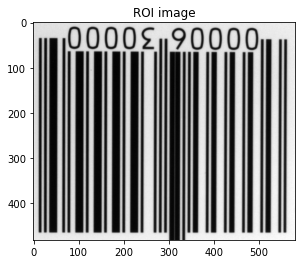

In [104]:
rotate(f'../images/{images_paths[40]}')

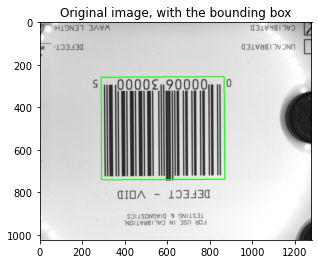

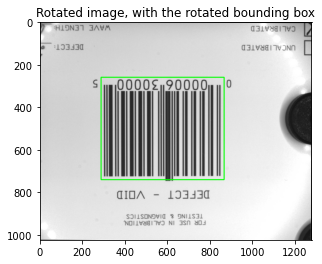

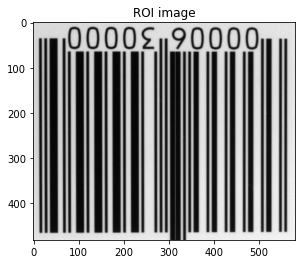

In [105]:
rotate(f'../images/{images_paths[41]}')

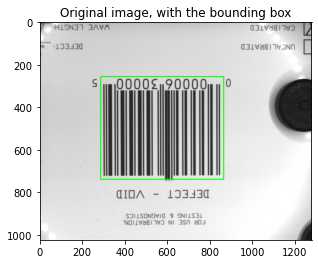

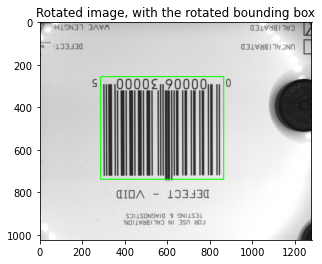

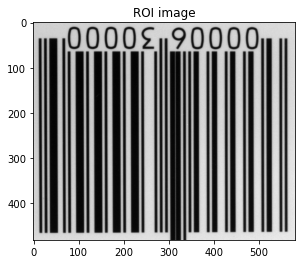

In [106]:
rotate(f'../images/{images_paths[42]}')

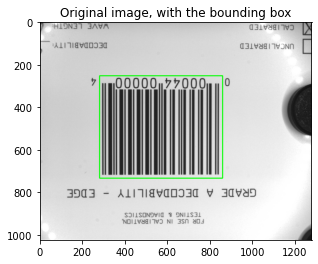

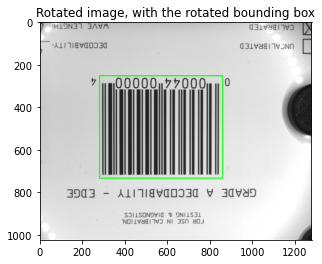

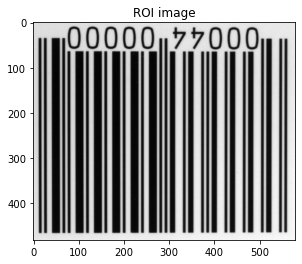

In [107]:
rotate(f'../images/{images_paths[43]}')

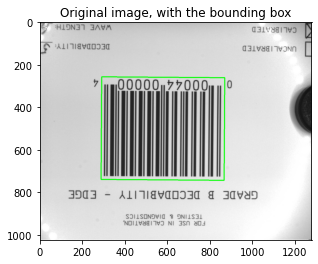

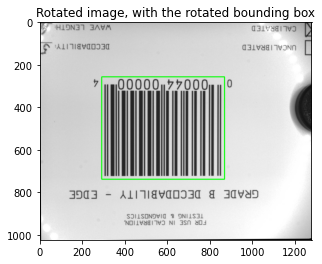

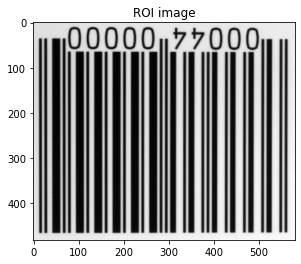

In [108]:
rotate(f'../images/{images_paths[44]}')

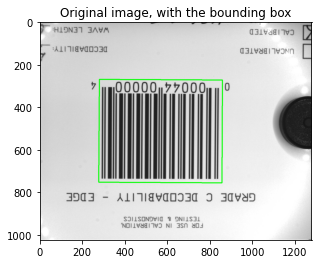

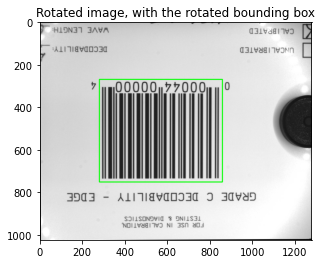

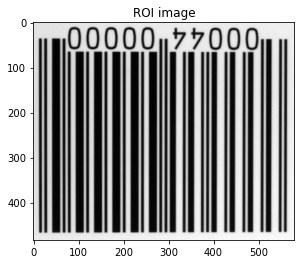

In [109]:
rotate(f'../images/{images_paths[45]}')

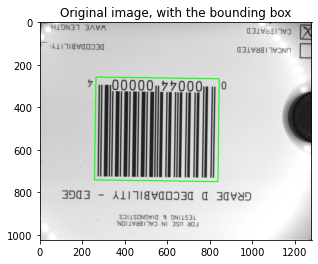

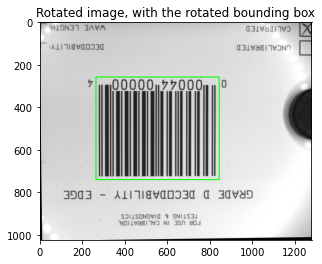

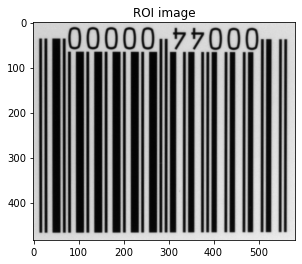

In [110]:
rotate(f'../images/{images_paths[46]}')

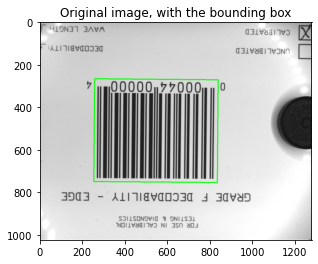

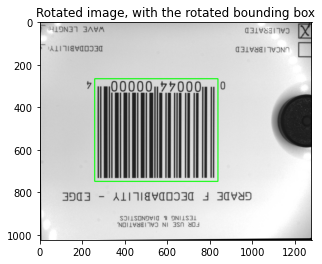

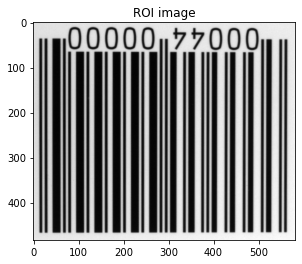

In [111]:
rotate(f'../images/{images_paths[47]}')

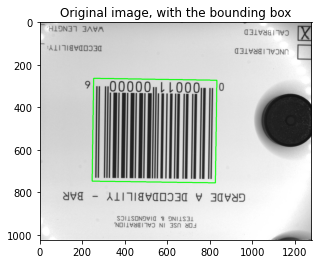

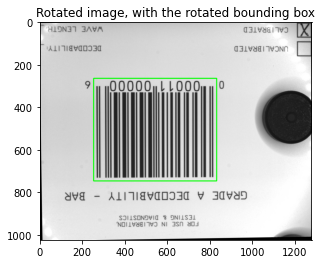

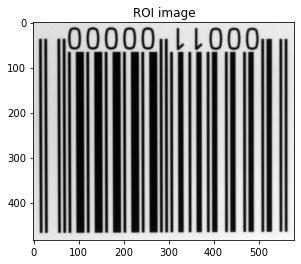

In [112]:
rotate(f'../images/{images_paths[48]}')

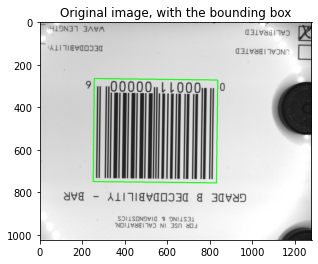

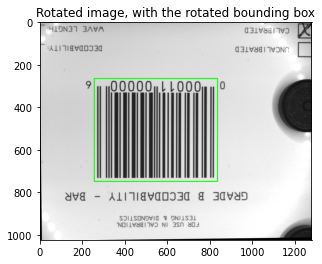

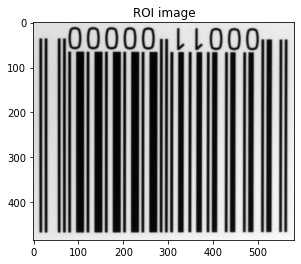

In [113]:
rotate(f'../images/{images_paths[49]}')

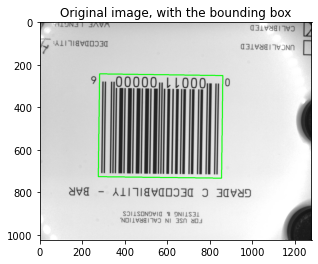

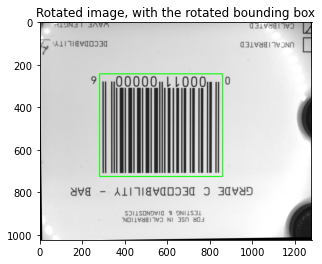

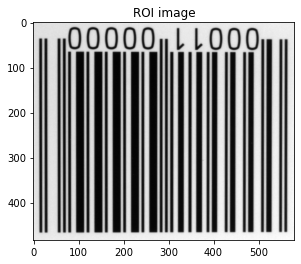

In [114]:
rotate(f'../images/{images_paths[50]}')

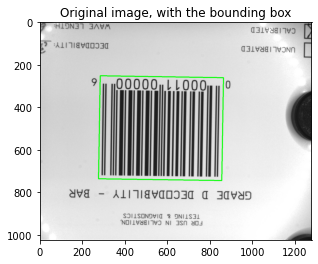

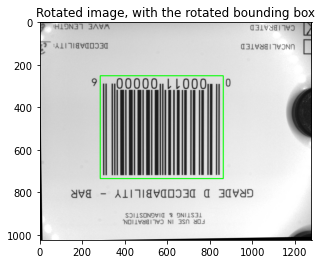

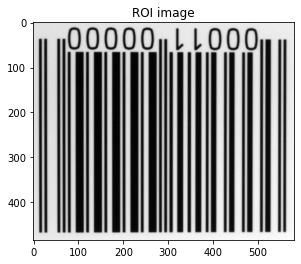

In [115]:
rotate(f'../images/{images_paths[51]}')

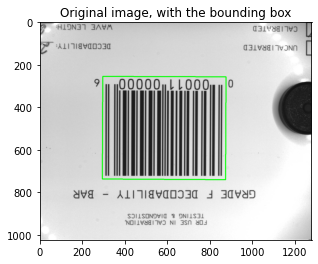

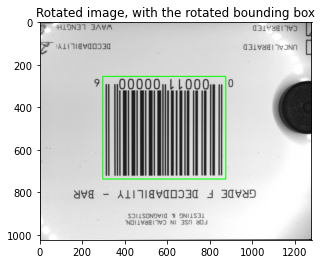

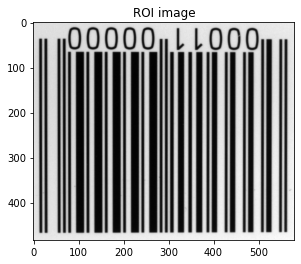

In [116]:
rotate(f'../images/{images_paths[52]}')